# <p style="background-color:#404E65;color:white;font-size:150%;text-align:center;border-radius:10px 10px;height:70px;padding-top: 20px;">Fund Allocation For Countries in Need</p>


### Problem Statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

### Aim :
- To cluster countries based on numerical features.
- It is an **Unsupervised Learning** problem statement.

### <center>Dataset Attributes</center>
    
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to rem...
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain th...
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

### Techniques used :
- Data Visualization techniques. 
- Feature Engineering & PCA.
- K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.

### Related Work :

- [Binary Classification](https://www.kaggle.com/competitions/titanic/discussion/352223) **: It is a discussion post that describes the approach required to deal with Binary Classification problems explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Time Series Analysis](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/352205) **: It is a discussion post that describes the basics of Time Series Analysis explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Unsupervised Learning](https://www.kaggle.com/code/tanmay111999/mall-customer-segmentation-k-means-eda) **: It is a notebook that describes the work on Unsupervised Learning problem using K-Means clustering algorithm!**

### Lets get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format #Displaying the floating point numbers to two decimals in the dataset
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
#Reading the dataset 
df = pd.read_csv('Country-data.csv')
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460


In [3]:
print(f"Data shape : {df.shape}")
print(f"Columns : {df.columns}")

Data shape : (167, 10)
Columns : Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [6]:
#all data types are correct . lets check for missing values 

def missing_values(df):
    
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total / len(df)) * 100 
    return pd.concat((total , percent) , axis = 1 , keys = ['Total' , 'Percent'])

miss_values = missing_values(df)
miss_values

,Total,Percent
country,0,0.00
child_mort,0,0.00
exports,0,0.00
health,0,0.00
imports,0,0.00
income,0,0.00
inflation,0,0.00
life_expec,0,0.00
total_fer,0,0.00
gdpp,0,0.00


In [7]:
#Determining the mean values of each numerical column 

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

In [8]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460


In [9]:
#seperating the numerical columns and categorical columns for checking the data distribution

column_names = df.columns.to_list()

categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)


Categorical columns: ['country']
Numerical columns: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Distribution of Features :

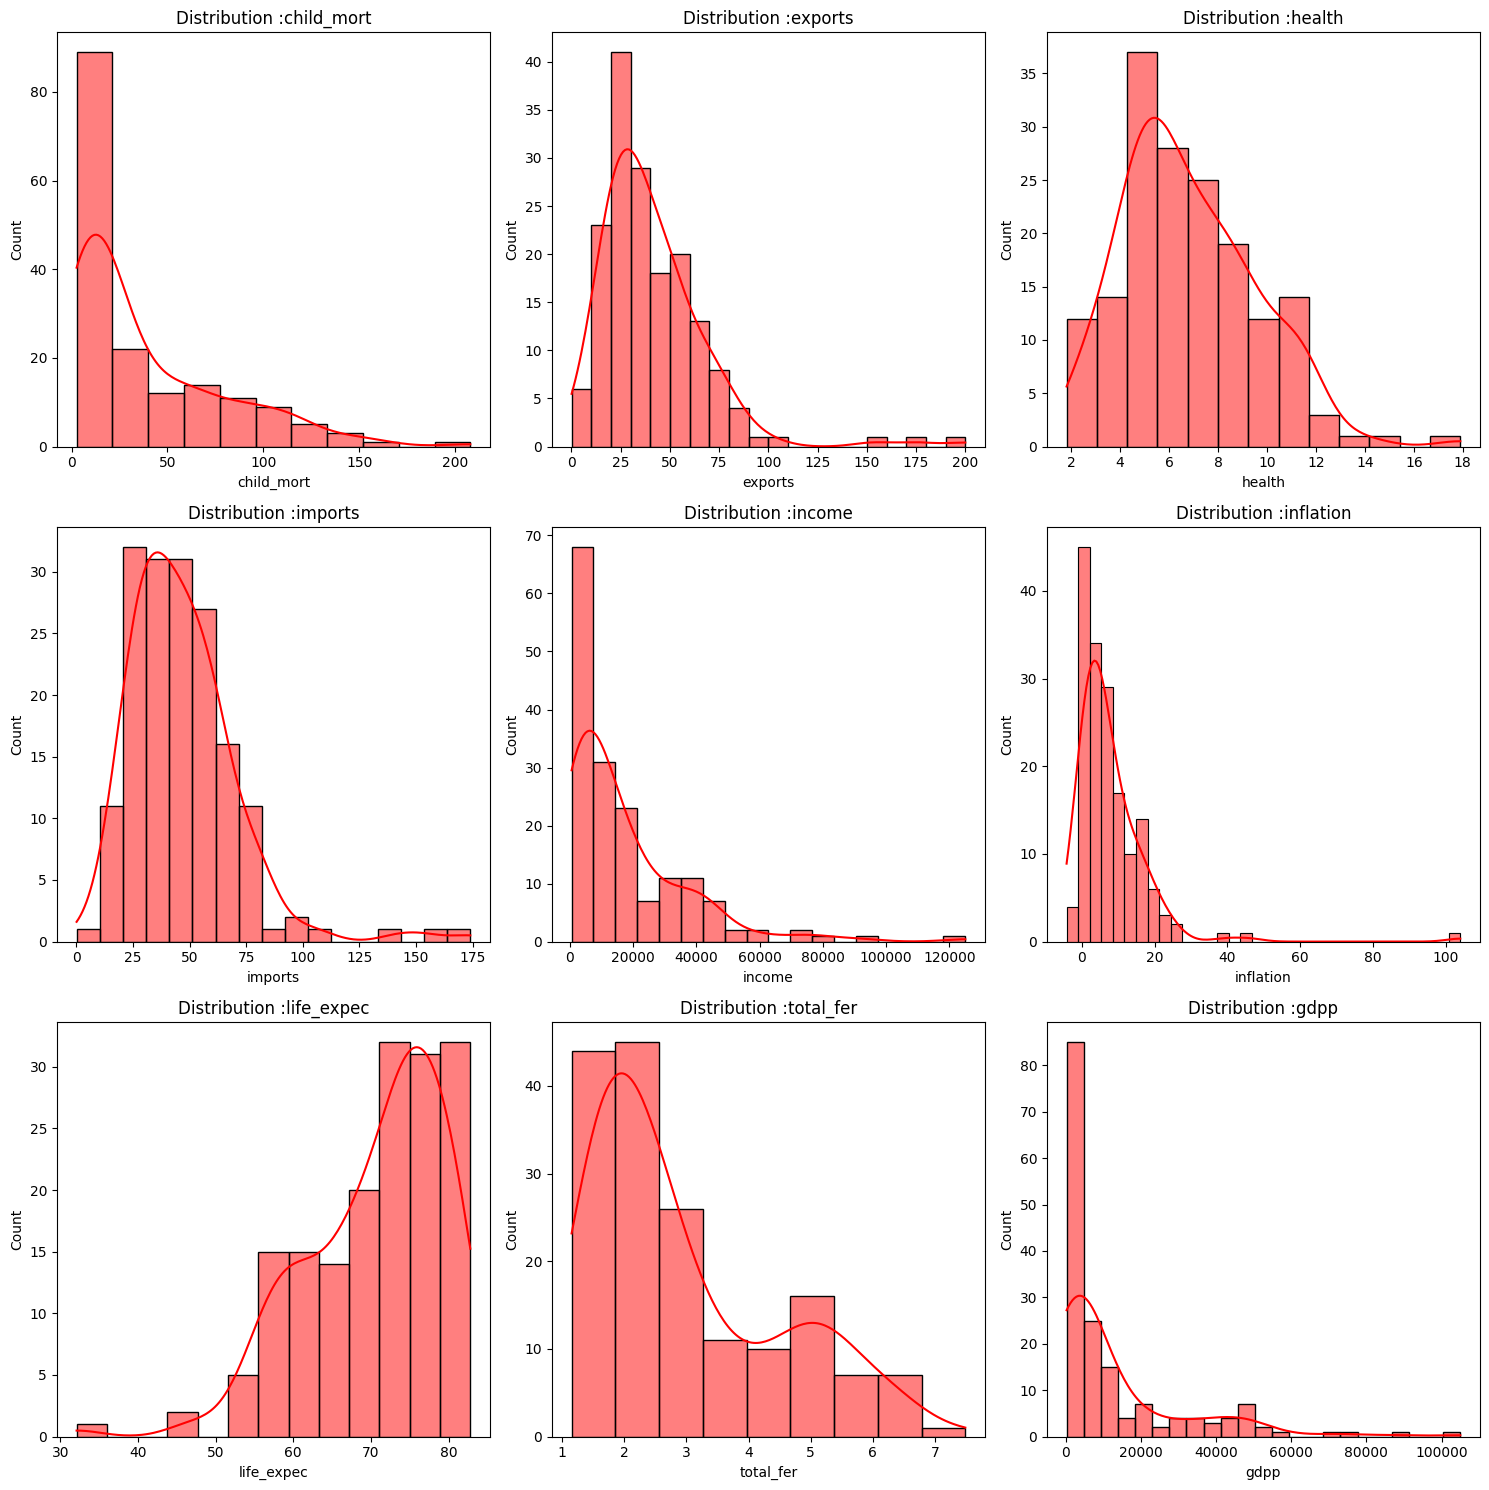

In [11]:
fig , axes = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15 , 15))
for i in range(len(numerical_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[numerical_columns[i]] , kde=True , color = 'r')
    title = 'Distribution :' + numerical_columns[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

- **life_expec** displays a **left or negatively skewed data distribution**.
- **health** displays a **normally distributed data**.
- All the remaining features show a **right or positively skewed data distribution**.
- Data distribution of **country** is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

### Features of Economically Backward Countries :

- The country's **per capita income is very low**.
- **High Population** that leads to non - availability of resources.
- **Unemployment** due to less resources.
- **Low country wealth** that leads to **low capital**.
- **Inequitable** distribution of **wealth** and **income**.  
- **Lack of proper educational amenities** and thus **illiteracy prevails**.
- **Low level of living**.
- **No technical advancement**.
- **Poor health services** coupled with **high birth & death rates**.

**HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!**

### Country vs Numerical Features 

- **Child_mort - Higher the child mortality can be observed in economical backward nations**

In [12]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460


In [13]:
mortality = df.groupby('country')['child_mort'].mean().reset_index()
grouped_mortality = mortality.sort_values(by = 'child_mort' , ascending= False)
grouped_mortality

,country,child_mort
66,Haiti,208.00
132,Sierra Leone,160.00
32,Chad,150.00
31,Central African Republic,149.00
97,Mali,137.00
...,...,...
53,Finland,3.00
144,Sweden,3.00
91,Luxembourg,2.80
133,Singapore,2.80


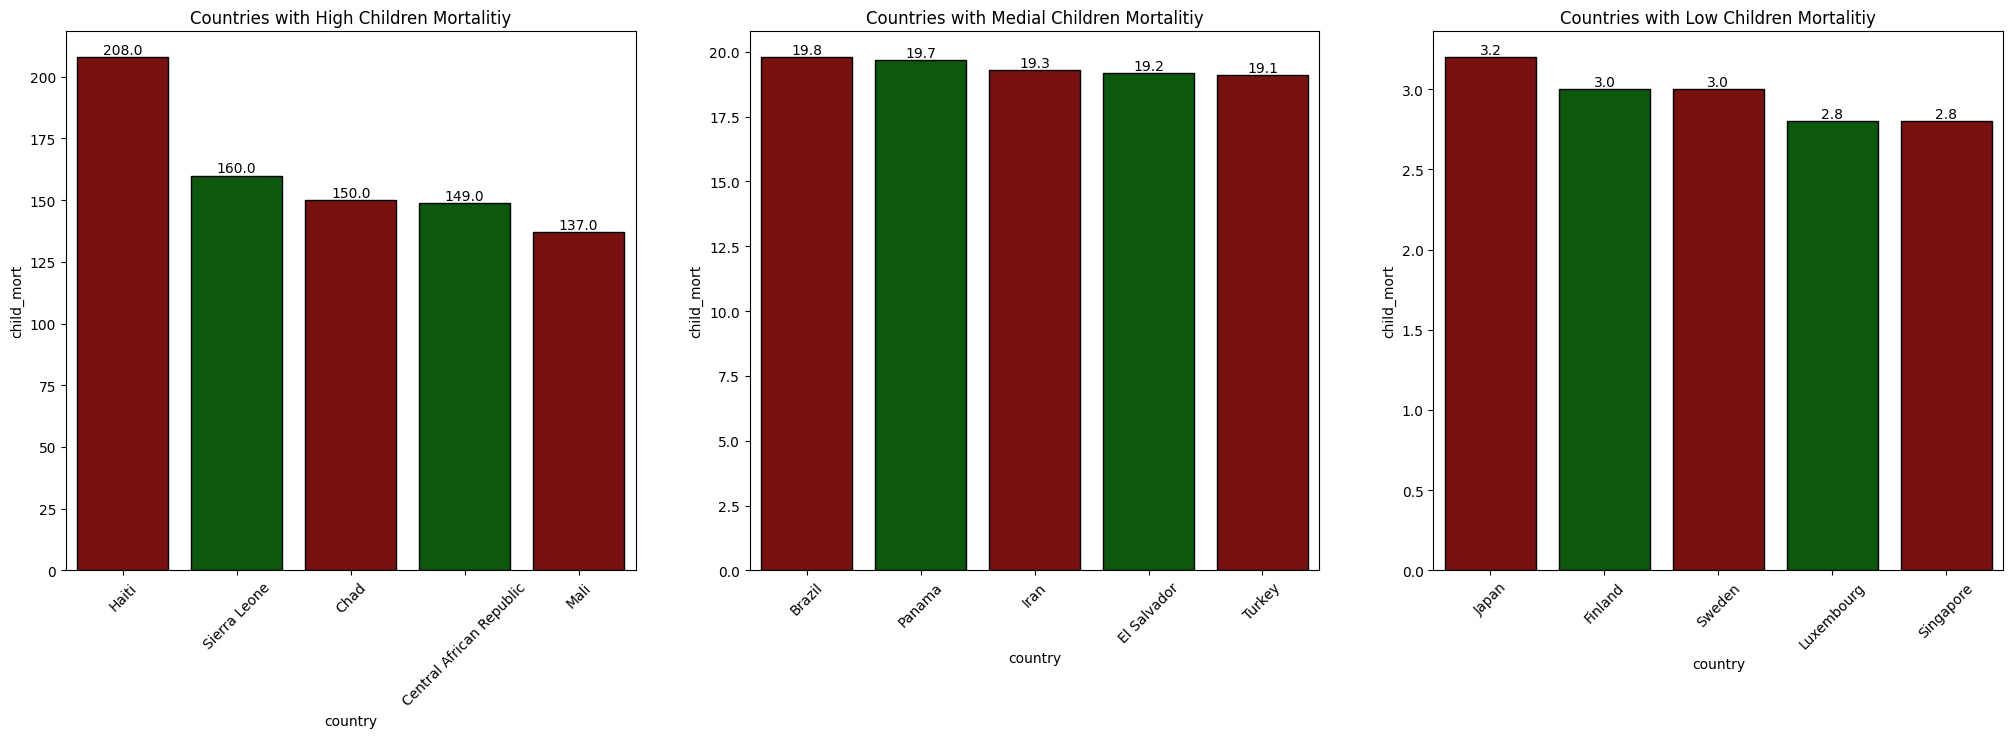

In [14]:
colors = ["#8B0000", "#006400"]

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot( x = 'country' , y = 'child_mort' , data = grouped_mortality[:5] , palette=colors , edgecolor = 'black')
plt.title('Countries with High Children Mortalitiy')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.xticks(rotation = 45)

plt.subplot(1,3,2)
ax= sns.barplot(x = 'country' , y = 'child_mort' , data = grouped_mortality[81:86] , palette=colors , edgecolor = 'black')
plt.title('Countries with Medial Children Mortalitiy')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.xticks(rotation = 45)


plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = grouped_mortality[161:166] , palette=colors , edgecolor = 'black' )
plt.title('Countries with Low Children Mortalitiy')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.xticks(rotation = 45)

    
plt.show()

- **Haiti** has the highest number of death rates , also ** African Countries ** have significant positions in this statistic
- **Asian & South Asian** countries have less child mortality rate .

- **exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

In [15]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [16]:
export = df.groupby('country')['exports'].mean().sort_values(ascending=False).reset_index()
export[:10]

,country,exports
0,Singapore,200.00
1,Luxembourg,175.00
2,Malta,153.00
3,Ireland,103.00
4,Seychelles,93.80
5,Malaysia,86.90
6,Equatorial Guinea,85.80
7,"Congo, Rep.",85.10
8,Hungary,81.80
9,United Arab Emirates,77.70


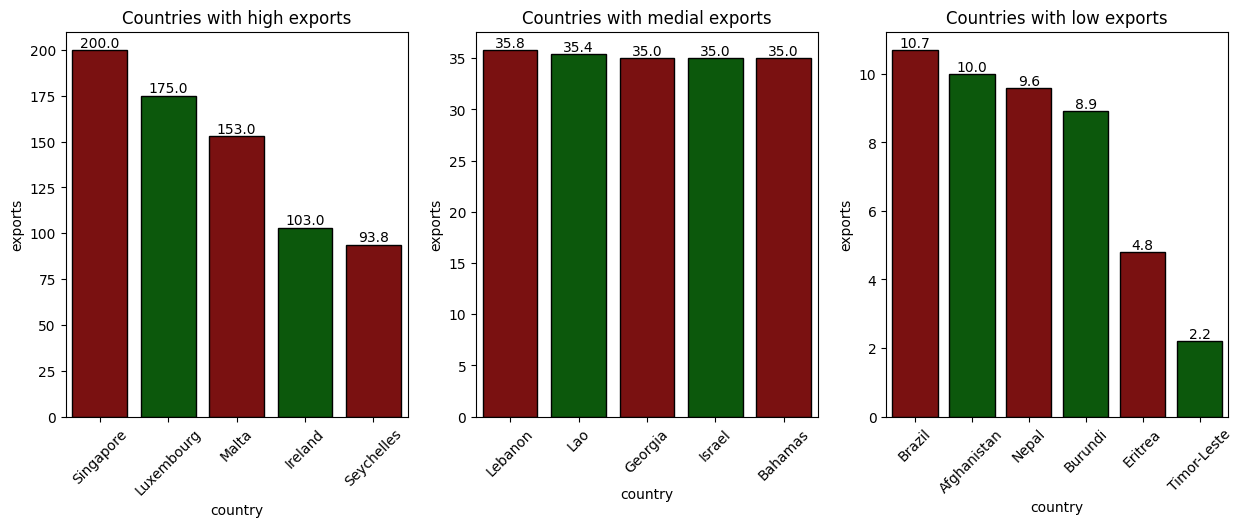

In [17]:
fig = plt.subplots(nrows=1 , ncols=3 , figsize = (15 ,5))
plt.subplot(1,3,1)
ax = sns.barplot( x = 'country' , y = 'exports', data = export[:5] ,palette = colors , edgecolor = 'black')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.title('Countries with high exports')
plt.xticks(rotation = 45)

plt.subplot(1,3,2)
ax = sns.barplot( x = 'country' , y = 'exports', data = export[81:86] ,palette = colors , edgecolor = 'black')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.title('Countries with medial exports')
plt.xticks(rotation = 45)

plt.subplot(1,3,3)
ax = sns.barplot( x = 'country' , y = 'exports', data = export[160:166] ,palette = colors , edgecolor = 'black')
for k in ax.patches:
    height = k.get_height()
    ax.text(k.get_x() + k.get_width() / 2., height, f'{height:.1f}', ha='center', va='bottom')
plt.title('Countries with low exports')
plt.xticks(rotation = 45)

plt.show()

- **exports** of a nation depends on the goods & services it produces based on the geographical location , natural resources , population etc .
- **Singapore,Luxembourg,Malta** being less populated countries have high exports . 
- **Afghanistan , nepal , brazil** having the least exports . This might be the result of small geographical area & availability of resources .

In [18]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


- **health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

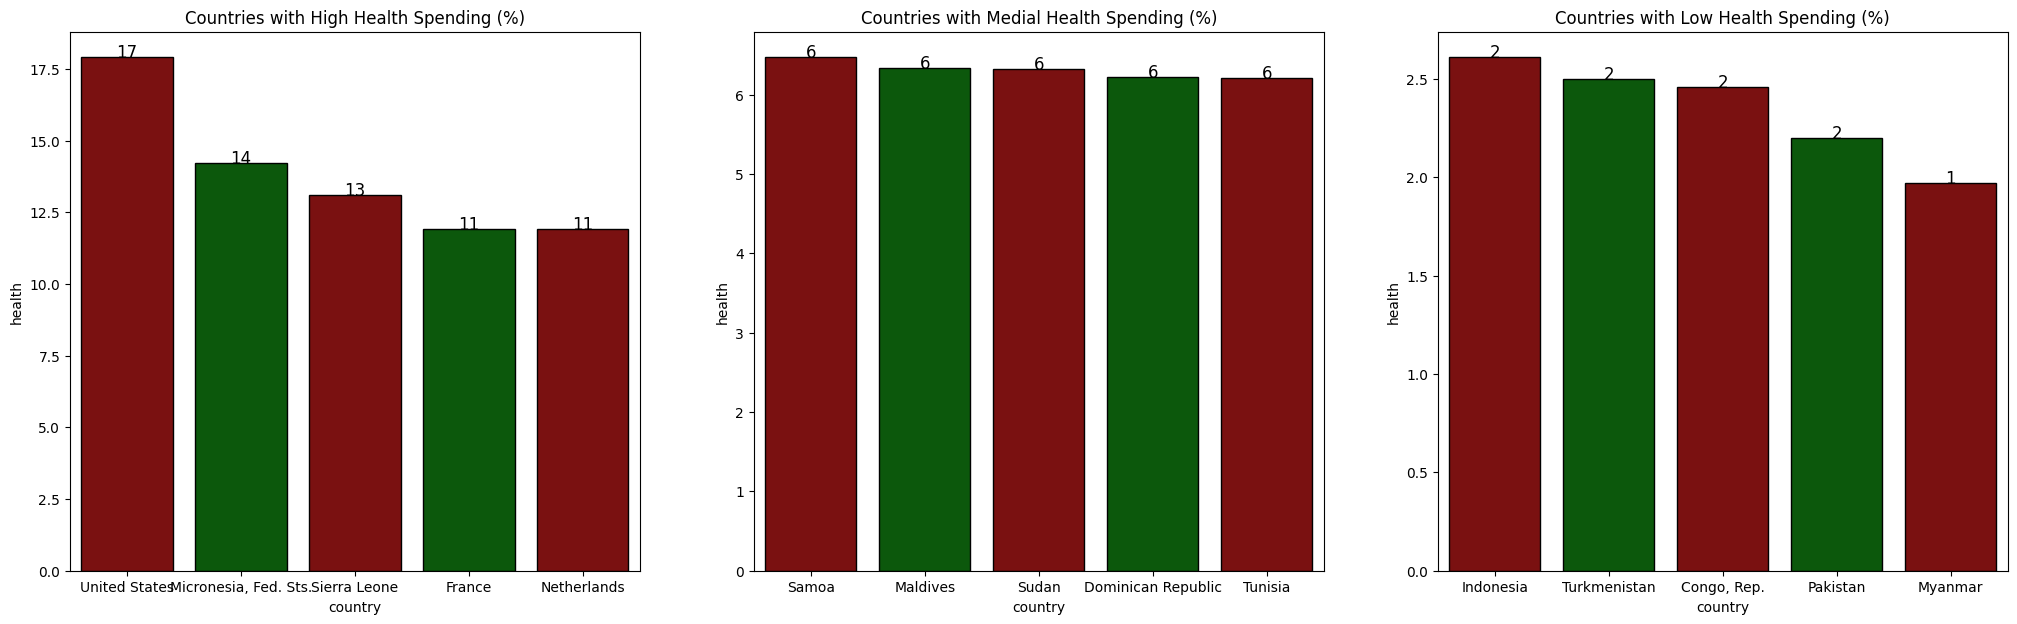

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **US** stands at the top when it comes to spending on health with **17%** of the individual GDP contribution.
- **6%** seems to be the mean values of the citizens spending on their **health**.
- **Asian** countries dominate the lower end of **health** with less than **3%**. They are the most ignorant citizens when it comes to health.

- **imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!**

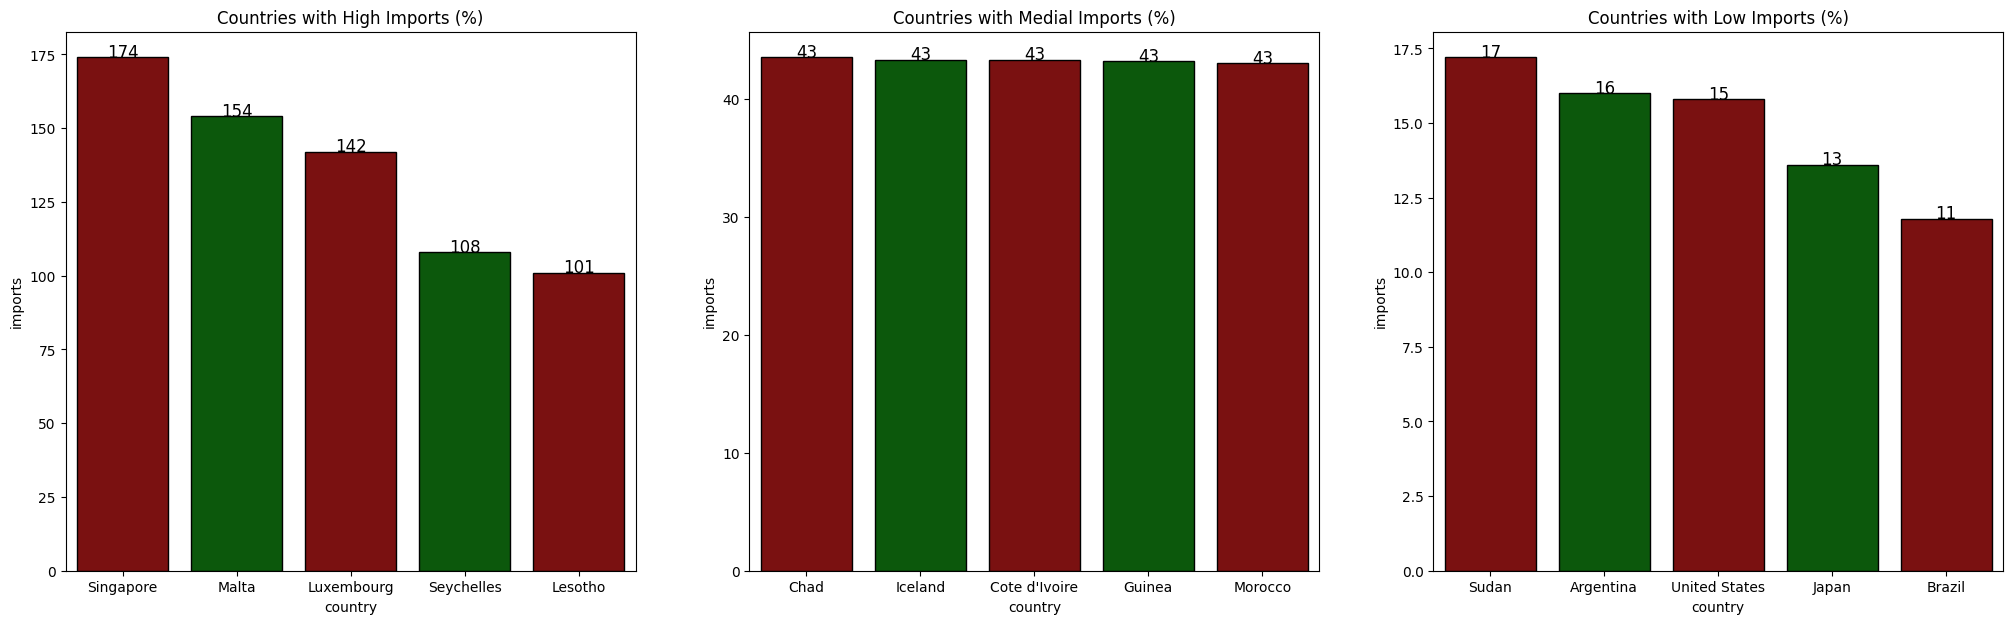

In [20]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **imports** stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources.
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid **exports** that gets countered by the heavy **imports** on something else. This just balances the books!
- **Brazil** has the lowest **imports** out of all the nations with **11%**. **Sudan** is the only African country present in this lower end list with **17%**.

- **income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

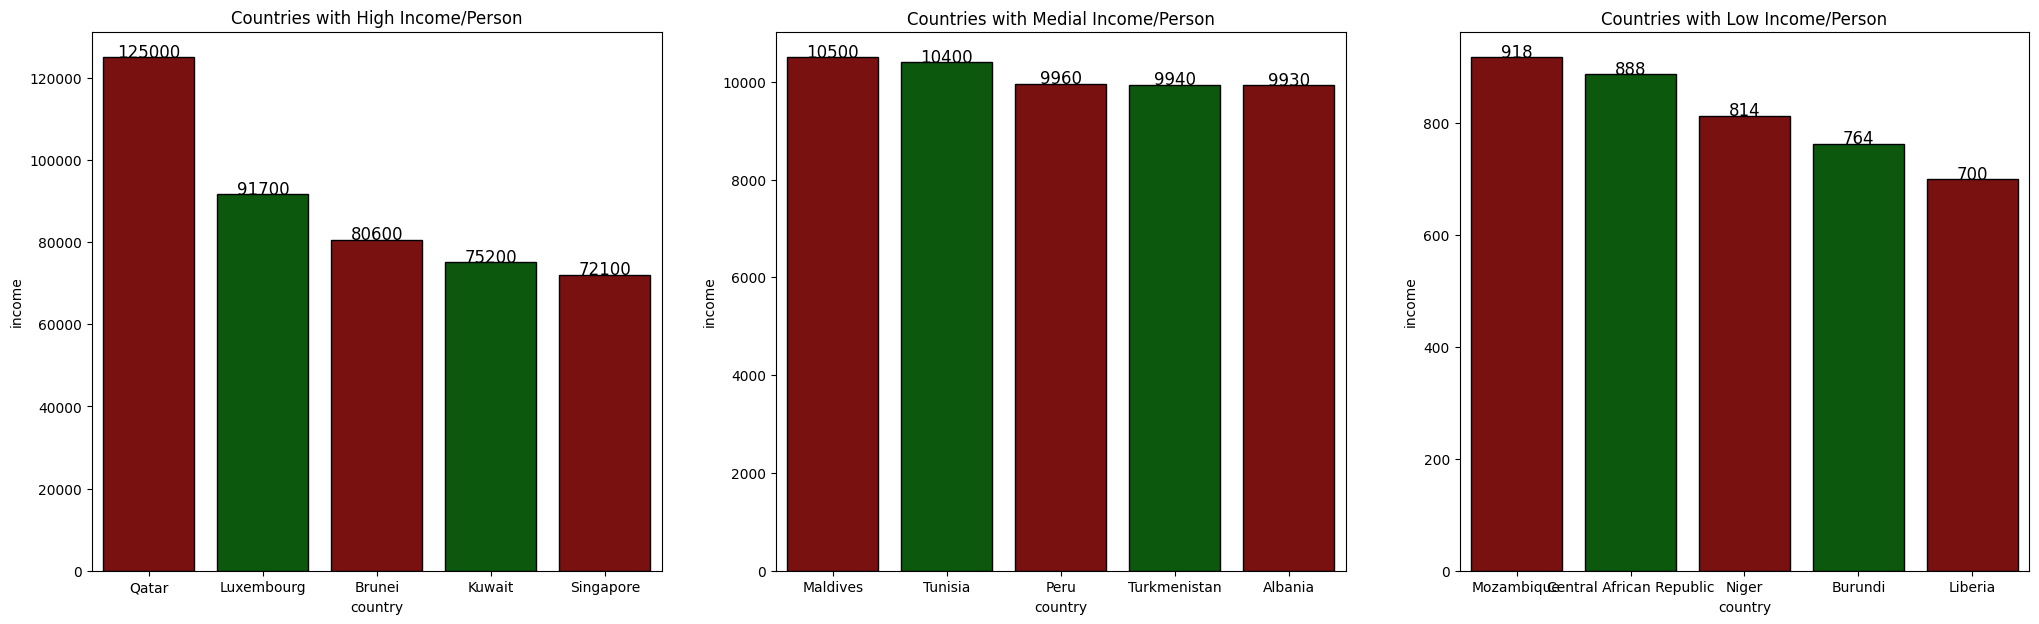

In [21]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Citizens of the **Qatar** have the highest **income** out of all the countries with a difference of **30k** more than the 2nd placed countries. **Singapore** & **Luxembourg** are again present in the top 5 of another feature.
- Lower end of the **income** is dominated by the **African** nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered. 
- The difference in the **income** of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

- **inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!**

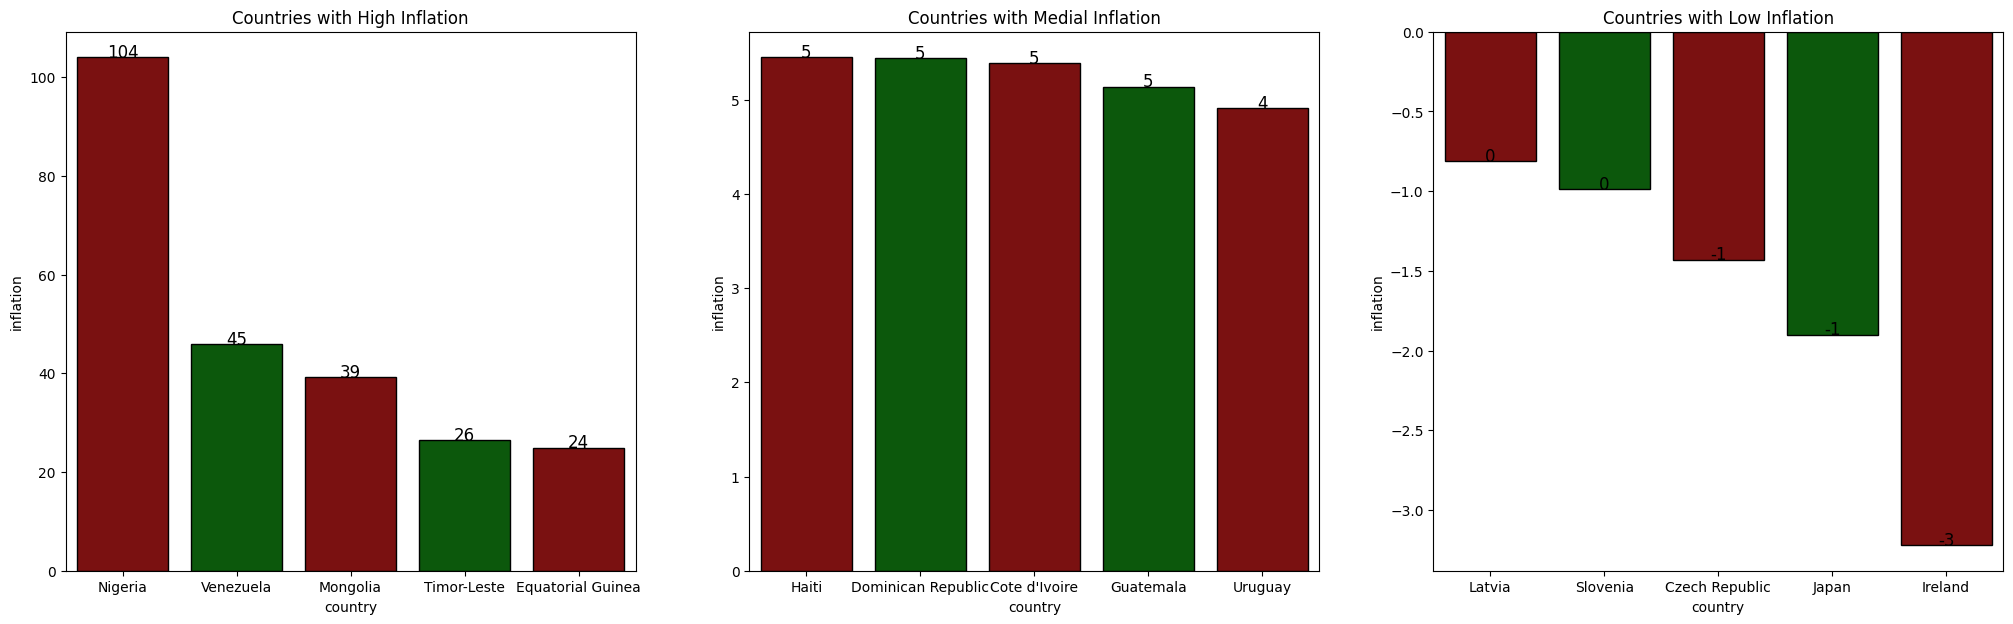

In [22]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Higher **inflation** reduces the purchasing power of the citizens. Countries present at the top end of **inflation** have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of **inflation** has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

- **life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!**

- **total_fer : Economically backward countries have a high fertility rate!**

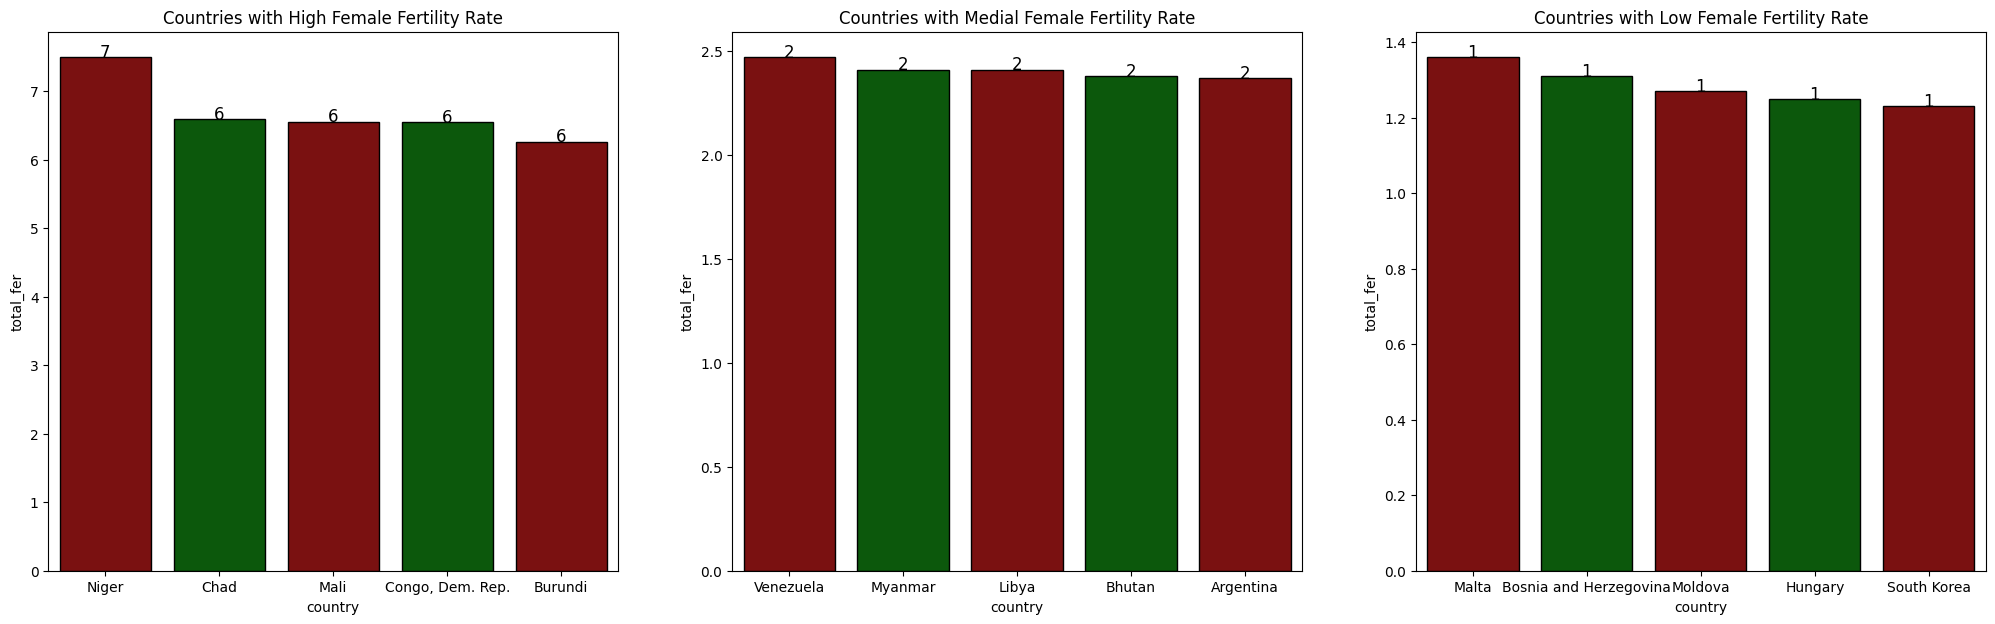

In [23]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **African** countries dominate the **total_fer** with values **6+**.
- Mean **total_fer** value is **2** whereas lower end values of **1** concern abit as well.

- **gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!**

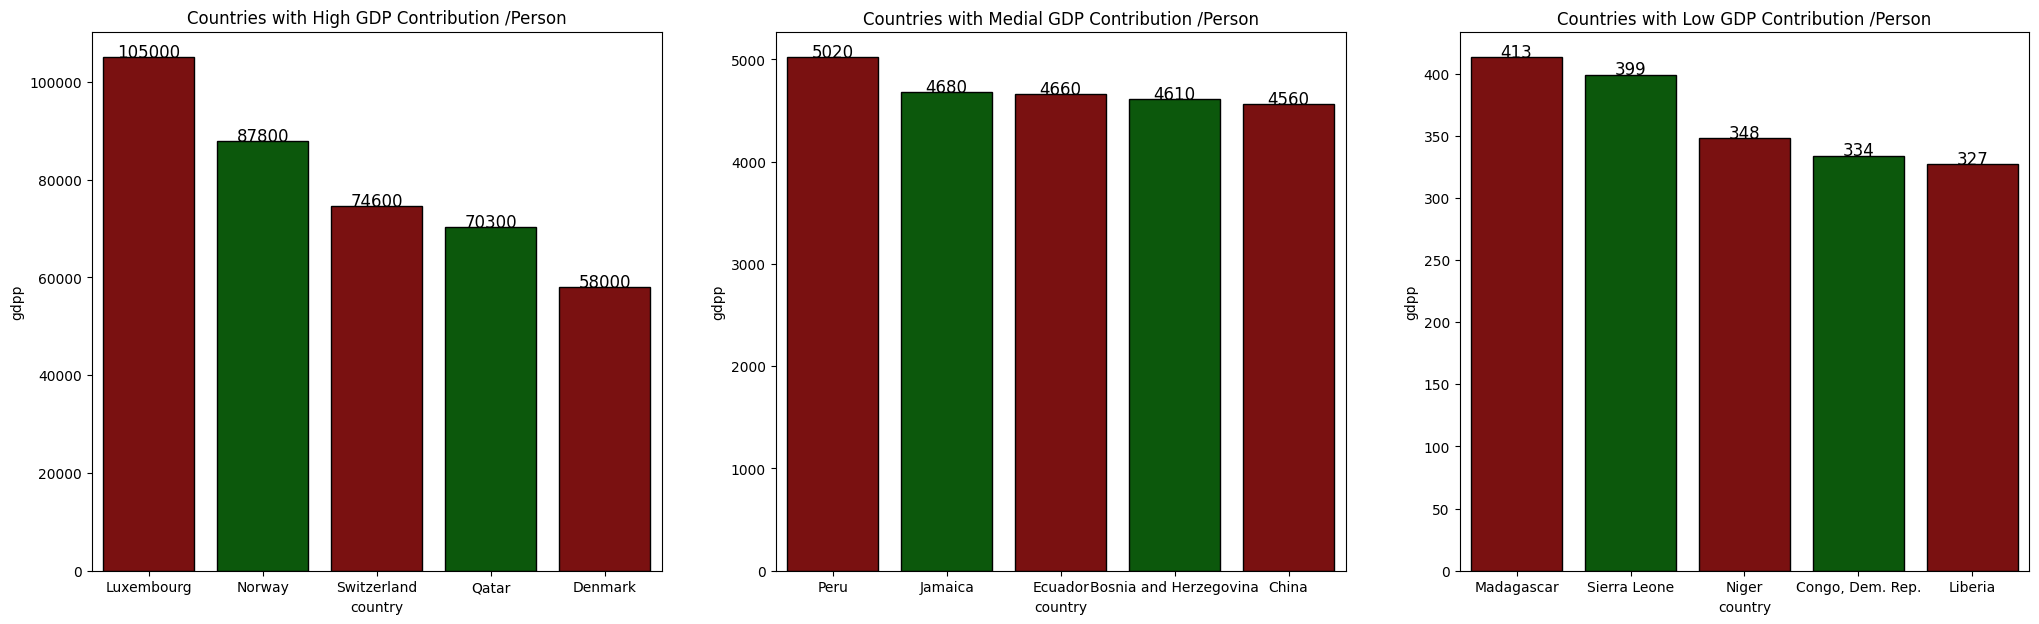

In [24]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is **China**. It has a huge population alongwith huge GDP.
- **Luxembourg** is again present in the top ranks. **Switzerland** & **Qatar** are present in the top 5 similar to **income**.
- Lower end is again dominated by **African** nations that labels them as the economically backward.

###  Numerical Features :

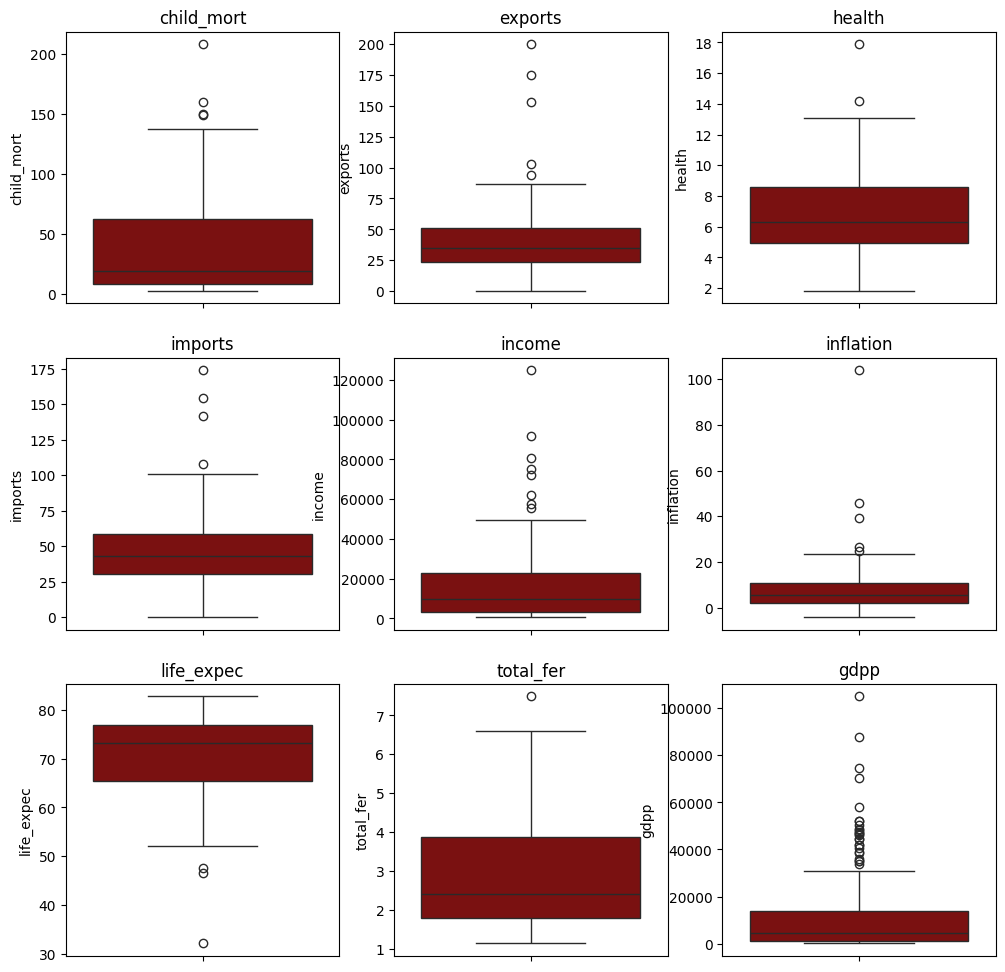

In [25]:
fig = plt.subplots(nrows=3 , ncols=3 , figsize = (12,12))
for i in range(len(numerical_columns)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(df[numerical_columns[i]] , color = colors[0])
    plt.title(numerical_columns[i])
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Summary EDA</div></center>

- From the visualizations and the list of features of an economically backward nations, a host of insights can be gained!
- When it comes to health conditions, **African countries** hold higher ranks in all the wrong situations. They hold a significant presence in high **child_mort**, low **life_expec** and high **total_fer**. 
- All these problems are already pretty serious and hence it is very important to assist them during the periods of unforseen turmoils. Despite such numbers, **Haiti** grabs the top spot with high values of  **child_mort**. **Asian & European countries** are present at the other end of it. 
- **US** citizens are the highest spenders on their **health** however they are not present in the top 5 ranks of **life_expec** & **total_fer**. None of the countries with a high **life_expec** are present in the top 5 of **health**. **Asian countries** crowd lower end of **health**. 
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. Population size and geographical locations play a pivotal role when it comes to **imports** and **exports**. 
- **Sudan** is the only **African** nation with low **imports** and **Brazil** has the lowest imports out of all.
- **African countries** display very high values of **inflation** whereas countries from all the continents can be found with low **inflation** values.
- Citizens of the **Qatar** are the highest paid with **Singapore** & **Luxembourg** again grabbing spots in top 5 of **income**.
- For **gdpp**, **Luxembourg** is in the top ranks. **Switzerland** & **Qatar** are present in the top 5 similar to **income**.
- **African nations** are present in the lower end of **income** as well as **gdpp**. Colonization has had a huge toll on the **African nations**.

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

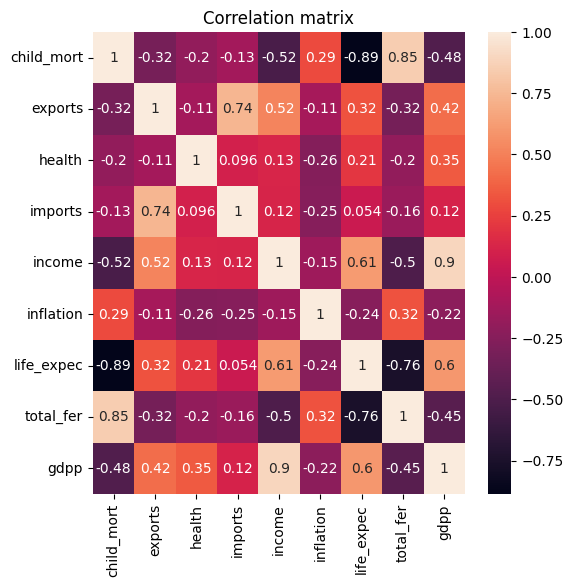

In [26]:
plt.figure(figsize=(6 ,6))
sns.heatmap(df[numerical_columns].corr(), annot = True , cbar = True)
plt.title('Correlation matrix')
plt.show()

- Many features have relationships with each other.
- **child_mort** clearly increases when **income**, **gdpp** & **exports** decreases. Rise in **inflation** also leads to high **child_mort** cases. Economic conditions unfortunately act as an important factor!
- Rise in **exports** clearly increases **gdpp**, **income** & **imports**.
- Spending on **health** has a small rise in **life_expec** and also decreases the **child_mort**.
- **income** & **gdpp** display a very high 0.9 correlation value. From the health perspective, high **income** has lead to higher **life_expec** but decreases the **total_fer** by some significant margin.
- As expected high **inflation** has a negative effect on the financial features. High **inflation** displays a high **total_fer** and **child_mort**. This describes the typical features of a backward nation.
- According to the data, higher **life_expec** displays a low **total_fer**. Higher **gdpp** has lead more spending on **health**. 

**We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.**
- The 3 categories of the features are :
    - **health** : **child_mort**, **health**, **life_expec**, **total_fer**
    - **trade** : **imports**, **exports**
    - **finance** : **income**, **inflation**, **gdpp**
- Hence, we will dissolve these features into these categories and normalize them by dividing each value of column with its mean and adding all of the values obtained to form a seperate category .

- **Why this is done ? :**

    - **Normalization** : By dividing each metric by its mean, the code normalizes the data, making different metrics comparable.
    - **Index Creation** :  Summing the normalized values creates composite indices for ‘Health’, ‘Trade’, and ‘Finance’, which can be used for further analysis or comparison.

In [27]:
df1 = pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24
...,...,...,...
162,3.61,2.26,0.74
163,3.07,1.07,7.90
164,3.31,3.46,1.92
165,4.77,1.46,3.40


### Data Scaling :

In [28]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

mms = MinMaxScaler() # normalization 
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1.insert( loc = 0 , value = list(df['country']) , column = 'country')
df1.head(5)

,country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl; Charges = Currency 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Health**, **Trade** and **Finance** features are normalized!


### Principal component analysis (PCA) :

- Before passing the data to pca , we need to scale the data appropriately . 
- We should always scale the data based on it distribution !

In [29]:
df2 = df.copy(deep = True)
col = list(df.columns)
col.remove('health')
col.remove('country')

# we will do standardization of health column coz it has a gaussian distribution

df2['health'] = ss.fit_transform(df2[['health']])
# remaining data we will do normalization coz it does not follow a gaussian distribution
for i in col:
    df2[i] = mms.fit_transform(df2[[i]])
df2.drop(columns = 'country' , axis = 0 , inplace = True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2= pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

- These are the variance values of each feature present in the dataset

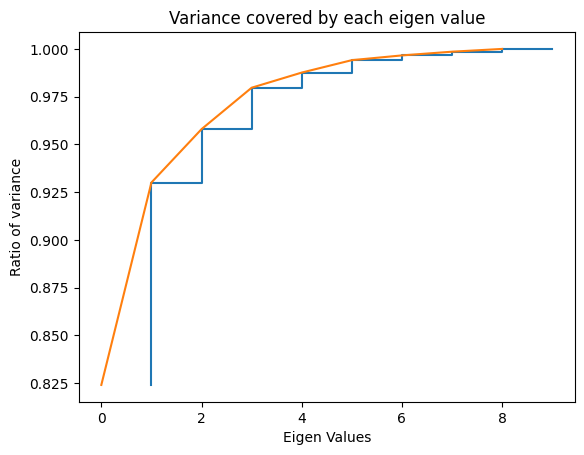

In [31]:
#creating a list of eigen values and computing the cumulative sum of the explained variance
plt.step(list(range(1,10)) , np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of variance')
plt.title('Variance covered by each eigen value')
plt.show()

- Typically eigen values with more than 95% ratio is selected 
- Here we can see that 0 to 2 eigen values have 95% of ratio 
- so we will select **Eigen Value : 2**

In [32]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head(3)

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13


- Now we will move on to the modelling section where we will compare the 2 datasets performance :
    - **Feature combination - Health , Finance , Trade**
    - **PCA Data**

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Modeling</div></center>

In [33]:
m1 = df1.drop(columns='country').values #feature combination values
m2 = pca_df2.values #pca values

## <center>K-Means Clustering</center>

**K-Means Clustering** is a distance based algorithm that is used for unsupervised learning that **does not support categorical features**. 
- It is the most preferred algorithm for dealing with **Unsupervised Learning** that does the job of finding clusters the in data but with a mathematical approach :
    - Selects 2 (assume k = 2) centroids randomly.
    - Distance between the centroids and all the data points are calculated.
    - If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
    - For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
    - This process repeats itself untill both centroids converge to fixed points.
- **k hyperparameter** : It defines the number of clusters or groups the data is to be divided into. For the selection of values of **k**, we use 2 statistical tests :
    - **Elbow Method** : It is a method that plots the sum of squared error for a range of values of **k**. If this plot looks like an arm, then **k** is the value that resembles an **elbow** is selected. From this **elbow** value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
    - **Silhouette Score Method** : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the **k** value with highest score is selected for modeling.

### <center>Feature Combination : Health - Trade - Finance</center> 

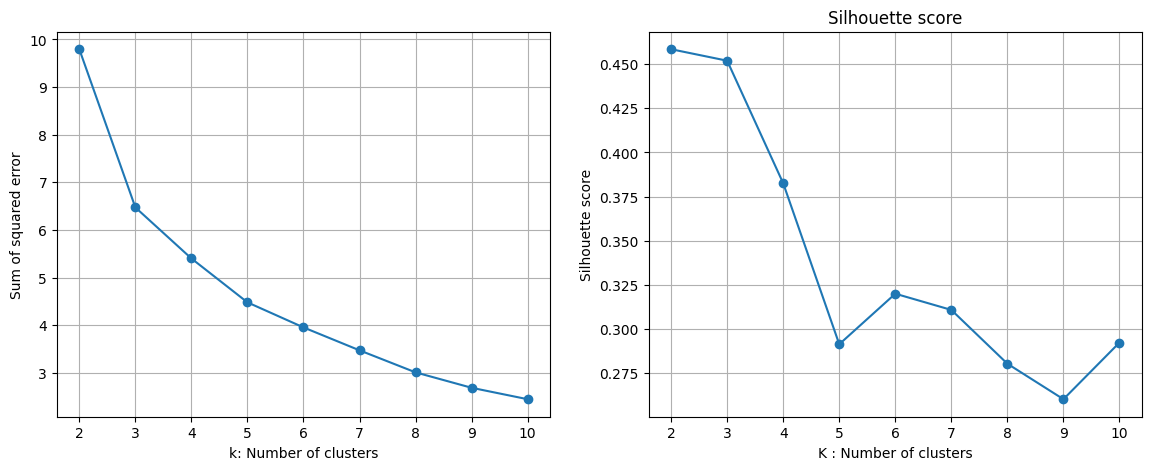

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , silhouette_samples
plt.subplots(ncols=2 , nrows= 1 , figsize = (14, 5))

#Elbow method
plt.subplot(1,2,1)
ssd = []
range_n_clusters = list(range(2,11))
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k , max_iter=1000 , random_state= 44)
    kmeans.fit(m1)
    ssd.append(kmeans.inertia_)
plt.plot(range_n_clusters , ssd , marker = 'o')
plt.xlabel('k: Number of clusters')
plt.ylabel('Sum of squared error')
plt.grid()

#Silhouette score
plt.subplot(1,2,2)
sil = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k , random_state= 43 , init = 'k-means++').fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1 , labels , metric= 'euclidean'))
plt.plot(range(2,11) , sil , marker = 'o')
plt.title('Silhouette score')
plt.xlabel('K : Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**

In [35]:
model = KMeans(n_clusters=3 , max_iter=1000 , random_state= 42)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['class'] = labels
df1['class'] = labels
df1.head(3)

,country,Health,Trade,Finance,class
0,Afghanistan,0.63,0.14,0.08,2
1,Albania,0.13,0.20,0.09,0
2,Algeria,0.18,0.19,0.21,0


- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplot of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

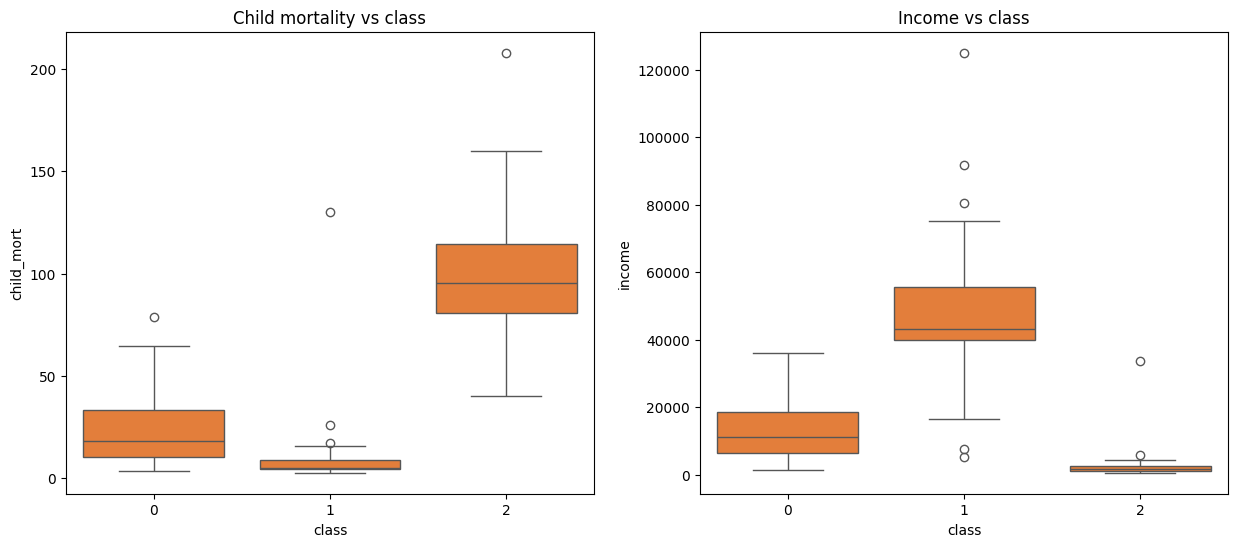

In [36]:
fig , ax = plt.subplots(ncols=2 , nrows= 1 , figsize = (15 , 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'class' , y = 'child_mort' , data = df , color= '#FF781f')
plt.title('Child mortality vs class')

plt.subplot(1,2,2)
sns.boxplot(x = 'class' , y = 'income' , data = df , color = '#FF781F')
plt.title('Income vs class')

plt.show()

- From the above plot we can conclude :
    - **0 : No Help Needed**
    - **1 : Help Might be Needed**
    - **2 : Need Help**

### <center>PCA Data</center> 

#### Elbow Method & Silhouette Score Method :

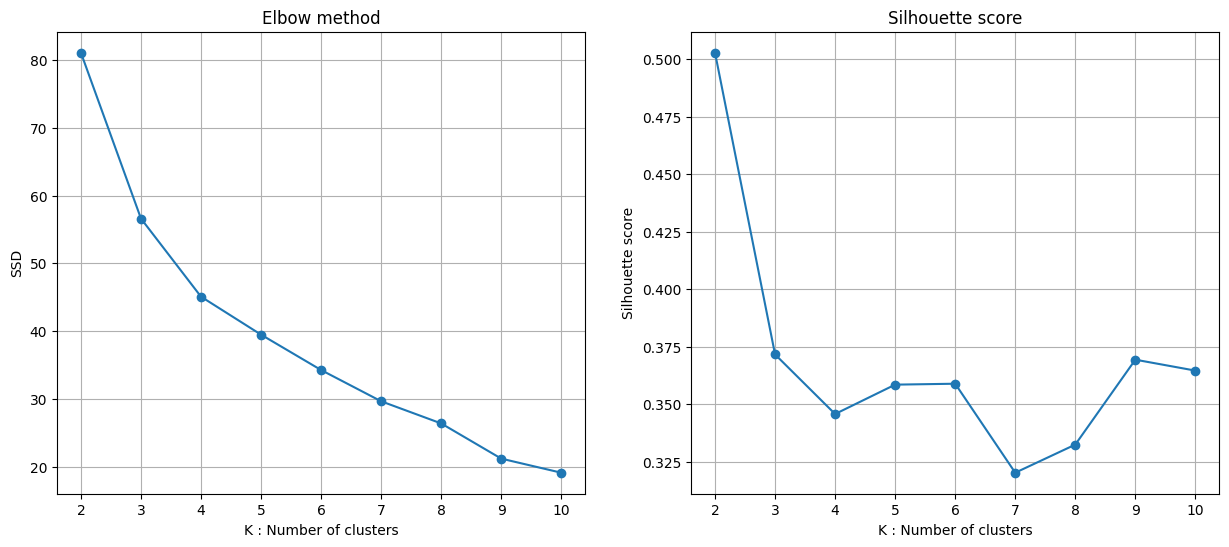

In [37]:
plt.subplots(ncols=2 , nrows= 1 , figsize = (15,6))

#elbow method
plt.subplot(1,2,1)
ssd = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters= k , max_iter= 1000 , random_state= 56).fit(m2)
    ssd.append(kmeans.inertia_)
plt.plot(range_n_clusters , ssd , marker = 'o')
plt.title('Elbow method')
plt.xlabel('K : Number of clusters')
plt.ylabel('SSD')
plt.grid()

#silhouette score 
sil = []
plt.subplot(1,2,2)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k , random_state= 55).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2 , labels , metric= 'euclidean'))
plt.plot(range_n_clusters , sil , marker = 'o')
plt.title('Silhouette score')
plt.xlabel('K : Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()

plt.show()
    

- From the results of the above 2 methods, we select :
    - **k : Clusters = 4**        

In [38]:
model = KMeans(n_clusters=4 , max_iter= 1000).fit(m2)
cluster = model.cluster_centers_ 
centroids = np.array(cluster)
labels = model.labels_
df['class'] = labels
pca_df2['class'] = labels
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,1
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,2
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0


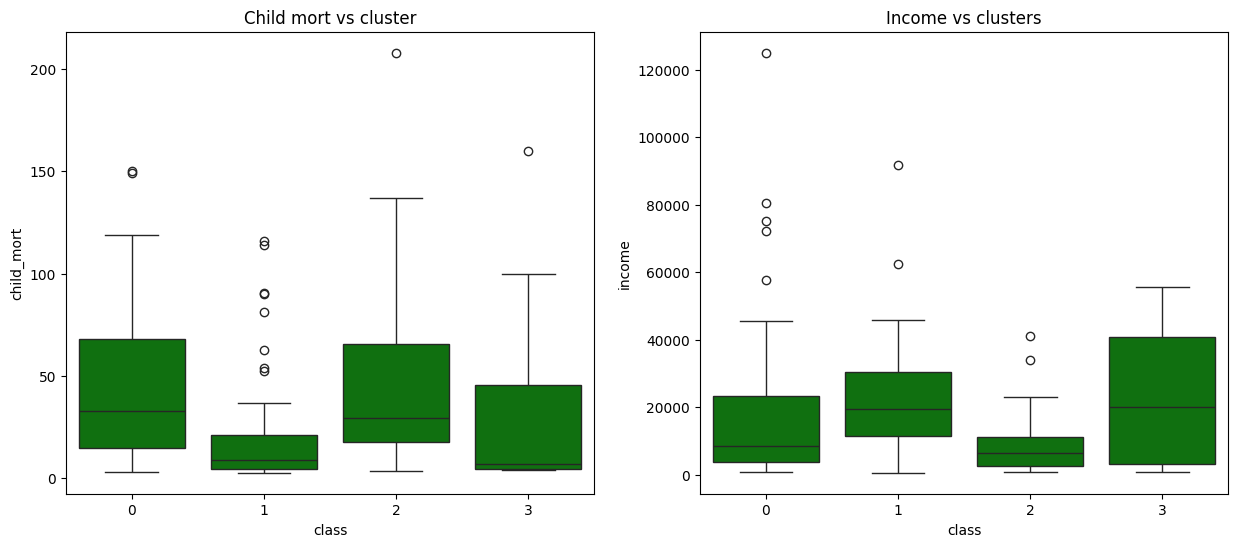

In [39]:
fig,ax = plt.subplots(nrows=1 , ncols= 2 , figsize = (15 , 6))

plt.subplot(1 ,2 ,1)
sns.boxplot(x = 'class' , y = 'child_mort' , data = df , color = 'green')
plt.title('Child mort vs cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'class' , y = 'income' , data = df , color = 'green')
plt.title('Income vs clusters')
plt.show()

- From the above plot we can conclude :
    - **0 : Might Need Help**
    - **1 : No Help Needed**
    - **2 : Might need Help**
    - **3 : Needs help**

## <center>Density Based Spatial Clustering of Application with Noise Clustering</center>

**DBSCAN Clustering** is a density based clustering algorithm that is used for unsupervised learning problems.
- In a bid to eliminate the problems of **K-Means Clustering** with nested data and high-dimensional data, **DBSCAN Clustering** eliminates it! It's has 3 important terms & 2 important hyperparameters :
    - Terms :
        - **Core Point** : It is the center point that has **minPts** number of data points present in it's area and the points under it's area can extend the cluster.
        - **Non-Core Point** : It is the center point that does not have **minPts** number of data points present in it's area and it cannot extend the cluster.
        - **Outliers / Noise** : It is the data points that are not a part of any cluster.
    - Hyperparameters :
        - **minPts** : It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
        - **Epsilon** : It is the radius of the area of a center point.
- **DBSCAN Clustering** creates the clusters in the following way :        
    - Select a random point and consider it as a center point from the data. 
    - Check the other data points that present in the area of this center point with the **Epsilon** value as it's radius.
    - If this area has **minPts** number of data points in it, then the center point is considered as a **core point**. 
    - The data points in this area are then considered as **core point** that further extends by the same rules creating a cluster. 
    - If any of the point does not satisfy the rules, it is considered as **non-core point** that remains the part of the cluster but it cannot extend the cluster further.
    - When all the **core points** are done with engulfing the other data points, **non-core points** are included & the cluster is completed.
    - The next cluster then starts forming by the same rules. Some of the points don't be a part of any of the clusters, such points are known as **outliers / noise**.
- As you might have noticed, the hyperparameters play a crucical role in this process. Thus, they have certain rules for assigning them values :
    - **minPts** : If D represents the number of dimensions / features of a dataset, then **minPts** >= D + 1. Typically **minPts** >= 2 * D is selected for smaller or noisy datasets. 
    - **Epsilon** : It's value is usually decided using the **k-distance graph** that is determined from the **KNN model**. The value at which the graph changes sharply is selected.

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>Feature Combination : Health - Trade - Finance</center> 

In [54]:
df1.head(3)

,country,Health,Trade,Finance,class
0,Afghanistan,0.63,0.14,0.08,2
1,Albania,0.13,0.20,0.09,0
2,Algeria,0.18,0.19,0.21,0


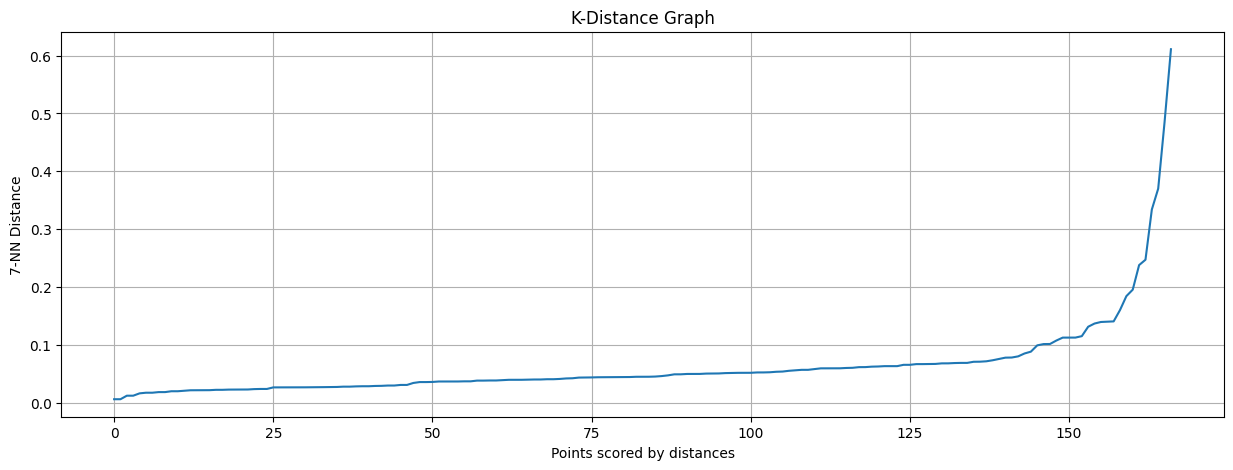

In [57]:
knn = NearestNeighbors(n_neighbors=7)
model = knn.fit(m1)
distances , indices = knn.kneighbors(m1)
distances =  np.sort(distances , axis = 0)
distances = distances[:,1]

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(distances)
plt.xlabel('Points scored by distances')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')
plt.show()

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [75]:
db = DBSCAN(eps = 0.08 , min_samples= 8).fit(m1)
labels = db.labels_

#Number of clusters in labels , ignoring noise if present
n_clusters = len(set(labels)) - ( 1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters : ' , n_clusters)
print('Number of outliers : ' , n_noise)

df['class_db'] = labels
df1['class_db'] = labels


Number of clusters :  3
Number of outliers :  67


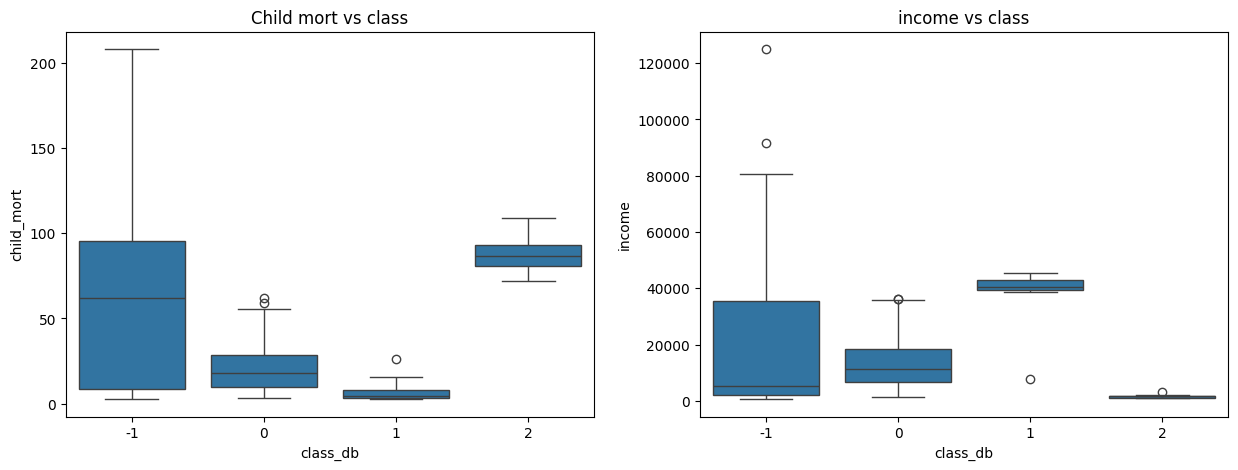

In [79]:
fig , ax = plt.subplots(nrows=1 , ncols= 2 , figsize = ( 15 ,5))

plt.subplot(1,2,1)
sns.boxplot( x = 'class_db' , y = 'child_mort' , data = df)
plt.title('Child mort vs class')

plt.subplot(1,2,2)
sns.boxplot( x = 'class_db' , y = 'income' , data = df)
plt.title('income vs class')

plt.show()

- By rule **-1** is associated with **Noise / Outliers**!
- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Might Need Help**
    - **1 : No Help Needed**
    - **2 : Help Needed**

### <center>PCA Data</center> 

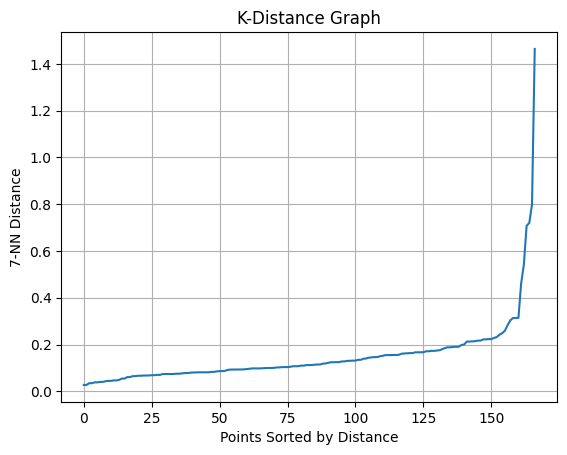

In [80]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [83]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

df['Class'] = labels; pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


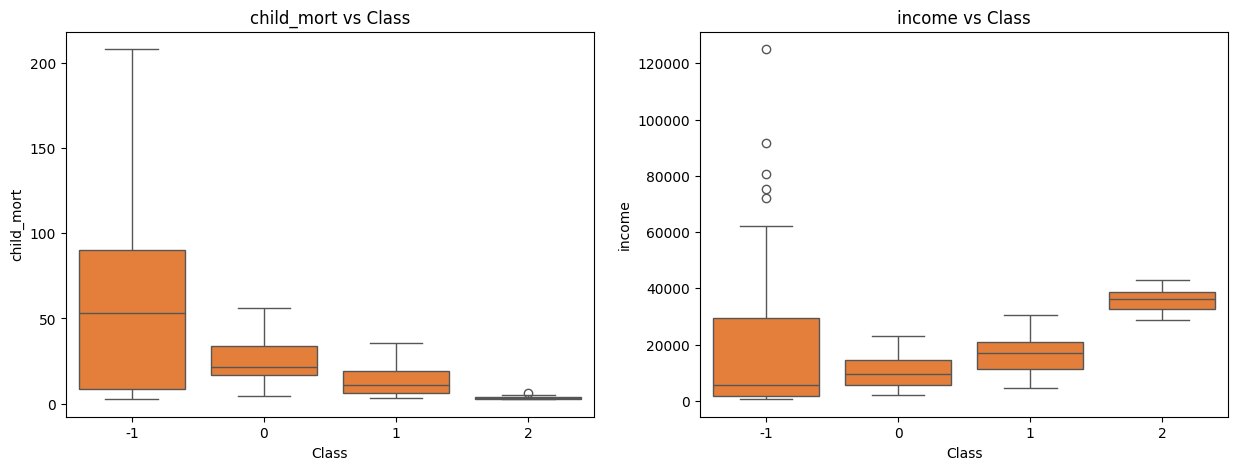

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df , color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**